In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.abspath('..'))

from src.GetSummary import summary

Let's use the summary function to collect the data from all participants

In [7]:
participants = []
baseDir = '../data/participantdata'

for folder in os.listdir(baseDir):
    path = os.path.join(baseDir, folder)
    if os.path.isdir(path):
        try:
            summ = summary(path).reset_index()
            summ['participant'] = folder
            summ = summ.set_index('participant')
            participants.append(summ)
        except Exception as e:
            print(f"Skipping {folder}: {e}")

summDf = pd.concat(participants)
summDf.head()

Skipping reldom2_s041: "['Order', 'Type'] not in index"


,Condition,accuracy,RT
participant,,,
reldom2_s001,FO_audwhat,1.00000,1.015675
reldom2_s001,FO_audwhere,0.78125,1.720722
reldom2_s001,FO_viswhat,1.00000,1.296370
reldom2_s001,FO_viswhere,0.96875,1.341634
reldom2_s001,SO_audwhat,1.00000,0.808944


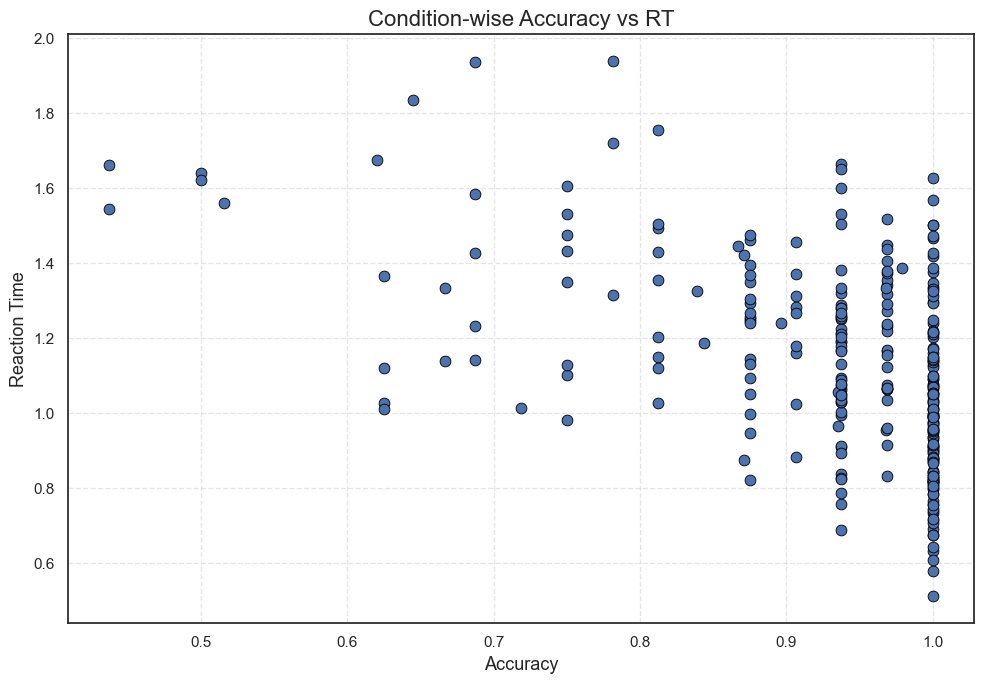

In [10]:
sns.set_theme(style="white", context="notebook")

# Choose a soft color palette
palette = sns.color_palette("Set2")

# Create the plot
plt.figure(figsize=(10, 7))
ax = plt.gca()

sns.scatterplot(data=summDf, x='accuracy', y='RT', s=60, edgecolor='black', ax=ax)

# Labeling and styling
plt.title("Condition-wise Accuracy vs RT", fontsize=16)
plt.xlabel("Accuracy", fontsize=13)
plt.ylabel("Reaction Time", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()